# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []
# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 548


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+f'q={city}&units=metric&APPID={weather_api_key}'
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather =  requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        
        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vorgashor
Processing Record 2 of Set 1 | tual
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | cockburn town
Processing Record 5 of Set 1 | puerto natales
Processing Record 6 of Set 1 | yermakovskoye
Processing Record 7 of Set 1 | edinburgh of the seven seas
Processing Record 8 of Set 1 | bilibino
Processing Record 9 of Set 1 | iskateley
Processing Record 10 of Set 1 | olonkinbyen
Processing Record 11 of Set 1 | baikunthpur
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | hadibu
Processing Record 14 of Set 1 | ribeira grande
Processing Record 15 of Set 1 | port mathurin
Processing Record 16 of Set 1 | minacu
City not found. Skipping...
Processing Record 17 of Set 1 | avarua
Processing Record 18 of Set 1 | waitangi
Processing Record 19 of Set 1 | blackmans bay
Processing Record 20 of Set 1 | kshenskiy
Processing Record 21 of Set 1 | adamstown
Proc

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          528
Lat           528
Lng           528
Max Temp      528
Humidity      528
Cloudiness    528
Wind Speed    528
Country       528
Date          528
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vorgashor,67.5833,63.9500,-1.64,89,100,9.42,RU,1739044844
1,tual,-5.6667,132.7500,28.17,82,100,9.28,ID,1739044846
2,grytviken,-54.2811,-36.5092,2.49,70,53,5.04,GS,1739044847
3,cockburn town,21.4612,-71.1419,26.98,78,40,6.69,TC,1739044848
4,puerto natales,-51.7236,-72.4875,14.25,47,75,11.83,CL,1739044850


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vorgashor,67.5833,63.9500,-1.64,89,100,9.42,RU,1739044844
1,tual,-5.6667,132.7500,28.17,82,100,9.28,ID,1739044846
2,grytviken,-54.2811,-36.5092,2.49,70,53,5.04,GS,1739044847
3,cockburn town,21.4612,-71.1419,26.98,78,40,6.69,TC,1739044848
4,puerto natales,-51.7236,-72.4875,14.25,47,75,11.83,CL,1739044850


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

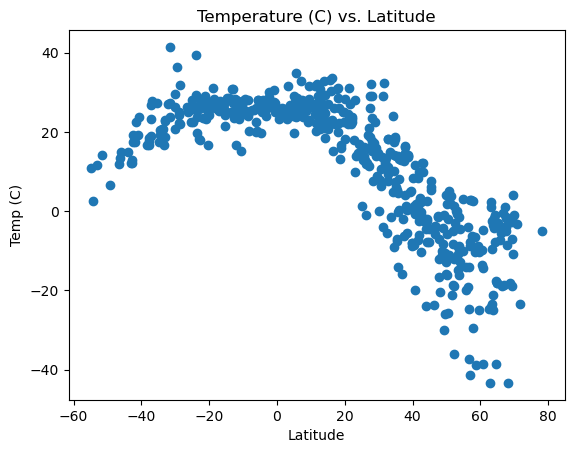

In [8]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'])
# Incorporate the other graph properties
plt.title('Temperature (C) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Temp (C)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

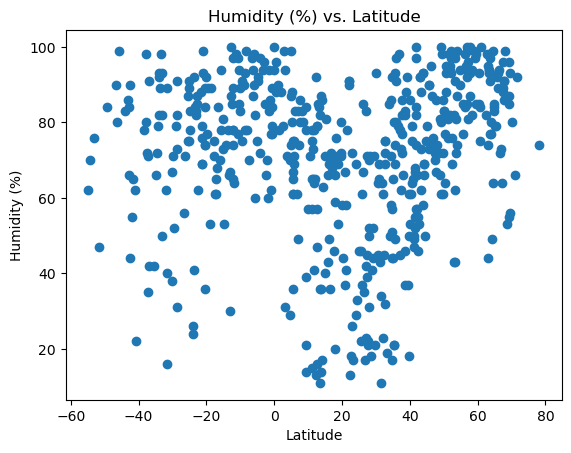

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'])

# Incorporate the other graph properties
plt.title('Humidity (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

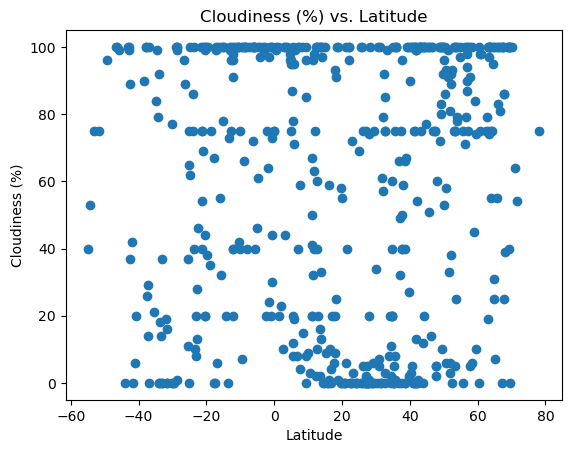

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.title('Cloudiness (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

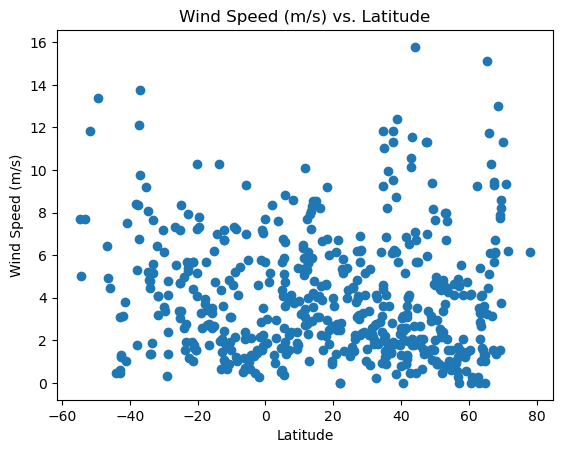

In [11]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'])
# Incorporate the other graph properties
plt.title('Wind Speed (m/s) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x,y,xlabel,ylabel,title,position):
    plt.scatter(x,y)    
    (slope, intercept, r_value, p_value, std_err) = linregress(x,y)
    line = slope *x+ intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x, line, color='red', label=f'Fitted')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    a=plt.annotate(line_eq,position,fontsize=15,color="red")
    plt.legend(loc='best')
    print(f"The r-squared is: {r_value**2}")

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df['Lat']>=0,:]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vorgashor,67.5833,63.9500,-1.64,89,100,9.42,RU,1739044844
3,cockburn town,21.4612,-71.1419,26.98,78,40,6.69,TC,1739044848
5,yermakovskoye,53.2831,92.4003,-14.81,97,100,0.81,RU,1739044851
7,bilibino,68.0546,166.4372,-43.29,99,39,1.37,RU,1739044853
8,iskateley,67.6803,53.1512,-3.83,91,86,6.15,RU,1739044855


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df['Lat']<0,:]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,tual,-5.6667,132.7500,28.17,82,100,9.28,ID,1739044846
2,grytviken,-54.2811,-36.5092,2.49,70,53,5.04,GS,1739044847
4,puerto natales,-51.7236,-72.4875,14.25,47,75,11.83,CL,1739044850
6,edinburgh of the seven seas,-37.0676,-12.3116,18.95,91,100,13.75,SH,1739044852
11,puerto ayora,-0.7393,-90.3518,27.53,89,44,2.24,EC,1739044860


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7030892385238783


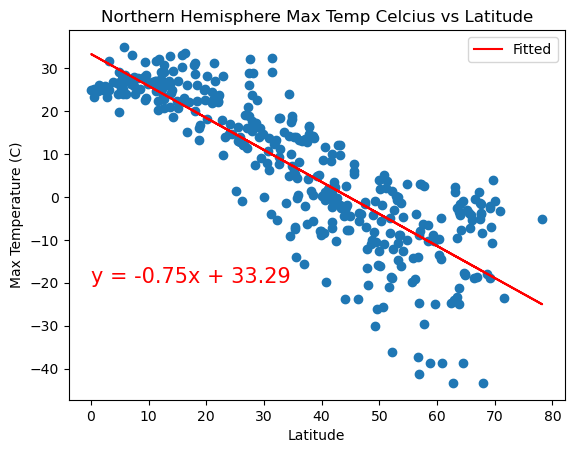

In [15]:
# Linear regression on Northern Hemisphere
create_linear_regression_plot(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'],'Latitude',"Max Temperature (C)","Northern Hemisphere Max Temp Celcius vs Latitude",(0,-20))

The r-squared is: 0.3248415782407256


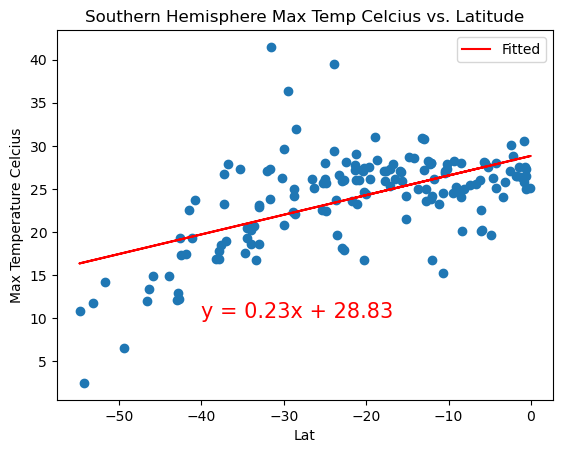

In [16]:
# Linear regression on Southern Hemisphere
create_linear_regression_plot(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'],'Lat',"Max Temperature Celcius","Southern Hemisphere Max Temp Celcius vs. Latitude",(-40,10))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.13220785840560292


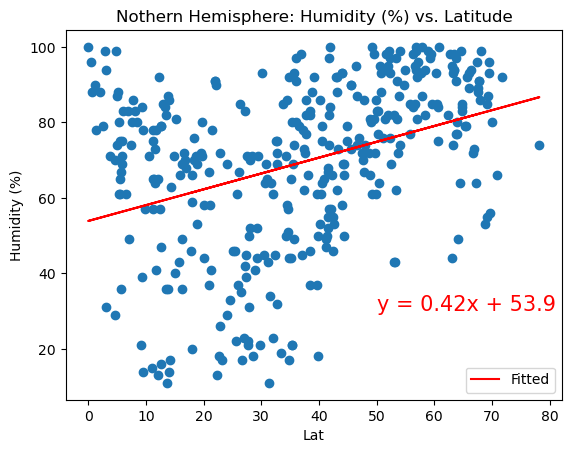

In [17]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df['Lat'],northern_hemi_df['Humidity'],'Lat',"Humidity (%)",'Nothern Hemisphere: Humidity (%) vs. Latitude',(50,30))

The r-squared is: 0.06714347805635382


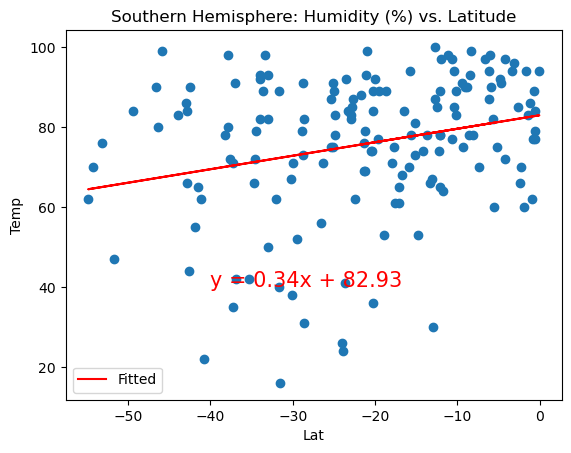

In [18]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df['Lat'],southern_hemi_df['Humidity'],'Lat',"Temp","Southern Hemisphere: Humidity (%) vs. Latitude",(-40,40))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.04780472261049472


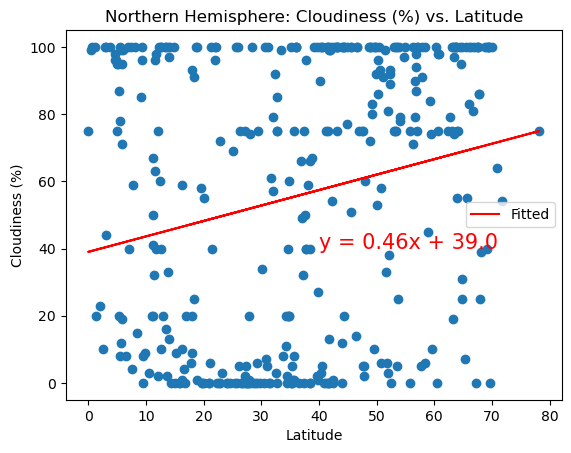

In [19]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'],'Latitude','Cloudiness (%)','Northern Hemisphere: Cloudiness (%) vs. Latitude',(40,40))

The r-squared is: 0.049271712979777435


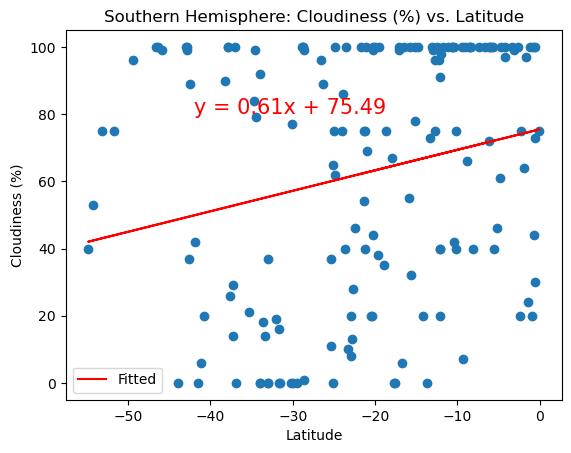

In [20]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'],'Latitude','Cloudiness (%)','Southern Hemisphere: Cloudiness (%) vs. Latitude',(-42,80))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.00017646545535810428


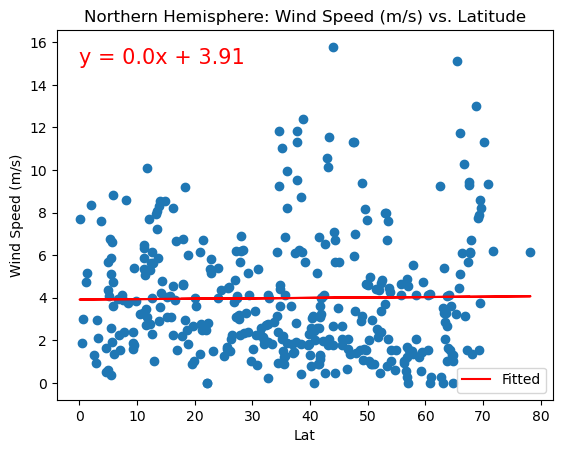

In [21]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'],'Lat',"Wind Speed (m/s)","Northern Hemisphere: Wind Speed (m/s) vs. Latitude",(0,15))

The r-squared is: 0.09498421214475515


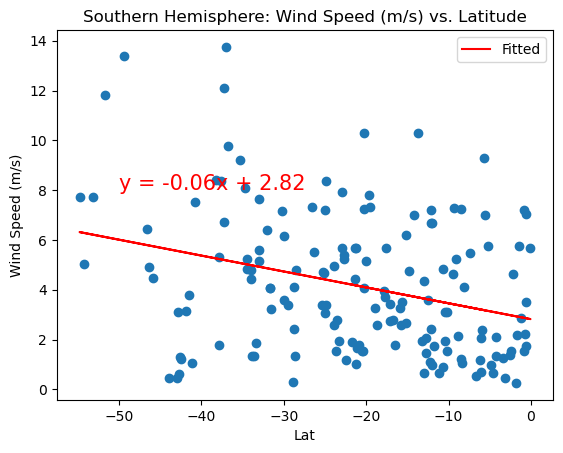

In [22]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'],'Lat',"Wind Speed (m/s)","Southern Hemisphere: Wind Speed (m/s) vs. Latitude",(-50,8))

**Discussion about the linear relationship:** YOUR RESPONSE HERE